In [1]:
from boot_utes import (reload, add_path, path)
add_path('..', '../src/', '~/repos/myutils/', )

from utils.ng_imps import *
exec(pu.DFCols_str)

%matplotlib inline
%autocall 1
%load_ext autoreload
%autoreload 2

Automatic calling is: Smart


In [2]:
pal = 'cividis'
pal = 'Paired'
sns.set_palette(pal)
z.lmap = z.compose(list, z.map)

norm_max = lambda x: x / x.max()
norm_log = z.compose(norm_max, np.log1p)

# Load

In [3]:
_dd = lambda: 0

In [4]:
dflt = pd.read_csv('../data/raw/experiment_eda/df_filter1_reduced.csv', parse_dates=['timestamp']).set_index('timestamp')
action_times = dflt.action.pipe(lambda s: s[s.shift(1) != s])
_dd.dflt = 'reduced, filtered'

In [5]:
dflt[:3]

,dispatch_count,duration,num_windows,action,rms_voltage,rms_current,active_pwr,active_energy,apparent_pwr,power_factor
timestamp,,,,,,,,,,
2018-09-13 09:35:45,105.0,351981.0,10.0,Experiment: Starting 1/Experiment - EDA,122.53,0.1968,11.80,0.000000,24.14,0.49
2018-09-13 09:35:46,105.0,351981.0,10.0,Experiment: Starting 1/Experiment - EDA,122.65,0.2033,12.80,0.003529,24.96,0.51
2018-09-13 09:35:47,105.0,351981.0,10.0,Experiment: Starting 1/Experiment - EDA,122.61,0.2215,13.91,0.003581,27.17,0.51


In [6]:
# dj1 = pd.read_json('../data/raw/experiment_eda/Experiment - EDA_1_experiment.json')
# dj1_ = pd.read_json('../data/raw/experiment_eda/Experiment - EDA_1_experiment.json')

## Counters and events

In [7]:
ff = '../data/raw/experiment_eda/Experiment - EDA_1_perf_counters.json'
fe = '../data/raw/experiment_eda/Experiment - EDA_1_experiment.json'

with open(ff, 'r') as ffp:
    pc = simplejson.load(ffp)

with open(fe, 'r') as ffp:
    pe = simplejson.load(ffp)

# Encode hosts as ints
ctr = Counter(
    subdoc['host']
    for doc in pc
    for win, subdoc in doc['tabs'].items()
)

h2i = dict(zip(Series(ctr).sort_values(ascending=False).index, it.count()))
# h2i = defaultdict(lambda ctr=count(): next(ctr))
# Series(ctr).sort_values(ascending=False).index.map(h2i.__getitem__)
i2h = mu.rev_dct(h2i)


_dd.pc = 'perf counters json doc'

## Actions

In [8]:
import utils.ng_utes as ngu


edf = (
    ngu.join_json_cols(pd.read_json(fe), ['meta'])
    .assign(
        ts=lambda c: pd.to_datetime(c.timestamp),
        Act=lambda x: x.action +  (': ' + x.website).fillna('')
    )
    .drop('timestamp', axis=1)
    .set_index('ts').sort_index()
)

_dd.edf = 'experimental actions'

## Hobo energy readings

In [9]:
pd.read_csv('../data/raw/experiment_eda/exp_1_hobo.csv', skiprows=1, nrows=0)

,"Date Time, GMT-07:00","RMS Voltage, V (LGR S/N: 20405897, SEN S/N: 20405897, LBL: rms_voltage)","RMS Current, A (LGR S/N: 20405897, SEN S/N: 20405897, LBL: rms_current)","Active Power, W (LGR S/N: 20405897, SEN S/N: 20405897, LBL: active_pwr)","Active Energy, Wh (LGR S/N: 20405897, SEN S/N: 20405897, LBL: active_energyy)","Apparent Power, VA (LGR S/N: 20405897, SEN S/N: 20405897, LBL: apparent_pwr)","Power Factor, PF (LGR S/N: 20405897, SEN S/N: 20405897, LBL: pwr_factor)",Started (LGR S/N: 20405897),Start/Stop Button Up (LGR S/N: 20405897),Start/Stop Button Down (LGR S/N: 20405897),Stopped (LGR S/N: 20405897),End Of File (LGR S/N: 20405897)


In [10]:
ng = pd.read_csv('../data/raw/experiment_eda/exp_1_hobo.csv', skiprows=1)
_dd.ng = 'Hobo energy measurements'

In [11]:
ng = ngu.hobo_process(ng)

## Remake dflt
- from hobo (ng)
    - and perf ctrs (pc)

In [12]:
# Interactive test variables
p = pc[0]
pc0t = pc[0]['tabs']
list(p)

['tabs', 'timestamp']



def extract_dur_disp(doc, main=True):
    d = z.keyfilter(lambda x: x in {'dispatchCount', 'duration'}, t0)
    host = doc['host']
    host_pref = 'M_{}' if main else 'C_{}'
    host_key = host_pref.format(h2i[host])
    d[host_key] = host
    return d
    
    
def extract_ctr(doc):
    out = {'ts': doc['timestamp']}
    t = doc['tabs']

extract_dur_disp(t0, main=True)

### Extract energy data

In [13]:
from utils.ng_utes import (Dict, List, Union, Ts_tabs, Disp_dur,
                           Tab_num, Tabs_doc, Num)
Children = str

In [14]:
def _extract_ctr_children_sum(doc: Tabs_doc) -> {Tab_num: Disp_dur}:
    default = {'dispatchCount': np.nan, 'duration': np.nan}
    
    def reduce_children(chs: List[Disp_dur]):
        # TODO: extract host info?
        disp_durs = lmap(ngu.extract_dur_disp_tab, chs)
        return ngu.reduce_keys(op.add, disp_durs) or default

    tab_docs = z.valmap(z.compose(reduce_children, itg('children')), doc)
    return tab_docs

ngu.extract_ctr_children_sum(pc0t)

{'0': defaultdict(int, {'dispatchCount': 4, 'duration': 0}),
 '1': defaultdict(int, {'dispatchCount': 10, 'duration': 336074}),
 '10': {'dispatchCount': nan, 'duration': nan},
 '13': {'dispatchCount': nan, 'duration': nan},
 '16': {'dispatchCount': nan, 'duration': nan},
 '2147483649': {'dispatchCount': nan, 'duration': nan},
 '3': {'dispatchCount': nan, 'duration': nan},
 '4294967297': {'dispatchCount': nan, 'duration': nan},
 '4294967298': {'dispatchCount': nan, 'duration': nan},
 '4294967299': {'dispatchCount': nan, 'duration': nan}}

In [15]:
def get_workers(pc0t: Dict[Tab_num, Dict[Children, List[Disp_dur]]]) -> Dict[Tab_num, List[bool]]:
    """{'0': {'children': [{'dispatchCount': 1,}, ...]}
    => {'0': [False, False], ...}
    """
    f = z.comp(list, z.map(itg('isWorker')), itg('children'))
    return z.valmap(f, pc0t)

get_child_workers_sum = z.compose(z.valmap(sum), get_workers)  #  -> Dict[Tab_num, int]
get_workers(pc0t)

{'0': [False, False],
 '1': [True, True],
 '10': [],
 '13': [],
 '16': [],
 '2147483649': [],
 '3': [],
 '4294967297': [],
 '4294967298': [],
 '4294967299': []}

In [17]:
get_child_workers_sum(pc0t)

{'0': 0,
 '1': 2,
 '10': 0,
 '13': 0,
 '16': 0,
 '2147483649': 0,
 '3': 0,
 '4294967297': 0,
 '4294967298': 0,
 '4294967299': 0}

## Lens implementation

In [41]:
from lenses import lens

In [46]:
getitem_one = lens[1]
getitem_one_getter = getitem_one.get()
getitem_one_getter([1, 0])

0

# End

In [19]:
def to_vectors(docs: List[Ts_tabs], tabs_extractor, ks=['dispatchCount', 'duration']):
    ts = pd.to_datetime(lmap(itg('timestamp'), docs))
    feat_dcts = lmap(z.compose(tabs_extractor, itg('tabs')), docs)

    # Normalize docs w/ missing tab keys
    all_ks = {k for fdoc in feat_dcts for k in fdoc}
    empty_doc_val = dict(zip(ks, it.repeat(np.nan)))
    all_ks_dct = dict(zip(all_ks, it.repeat(empty_doc_val)))

    def norm_doc(tabs):
        return z.merge(all_ks_dct, tabs, )
        return z.merge(tabs, all_ks_dct)

    n_feat_dcts = lmap(norm_doc, feat_dcts)
    # print(n_feat_dcts[:3])

    k2tab_srs = {
        feat_name: lmap(
            z.valmap(itg(feat_name)),
#             lambda Doc: z.valmap(itg(feat_name), doc)
            n_feat_dcts  # tab -> feat_cts
        )
        for feat_name in ks
    }
    return z.valmap(partial(DataFrame, index=ts), k2tab_srs)
    return n_feat_dcts

In [21]:
to_vectors_c = z.compose(z.valmap(ngu.cleanup_counter_df), to_vectors)
vecs = to_vectors_c(pc[:], ngu.extract_ctr_main)
cvecs = to_vectors_c(pc[:], ngu.extract_ctr_children_sum)

In [23]:
to_n_worker_dct = lambda x: {'n_workers': x}
c_n_worker_df = to_vectors(pc, tabs_extractor=z.comp(z.valmap(to_n_worker_dct), get_child_workers_sum), ks=['n_workers'])['n_workers']
c_n_worker_df = ngu.cleanup_counter_df(c_n_worker_df, diff=False)

In [24]:
c_n_worker_df[:3]

,0,1,10,13,16,2147483649,2147483725,2147483727,3,4294967297,4294967298,4294967299
2018-09-13 09:35:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-13 09:35:38,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0
2018-09-13 09:35:39,0.0,2.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0


In [27]:
_perfs = DataFrame({
    'Disp': vecs['dispatchCount'].sum(axis=1),
    'Dur': vecs['duration'].sum(axis=1),
    'Cdisp': cvecs['dispatchCount'].sum(axis=1),
    'Cdur': cvecs['duration'].sum(axis=1),
    'N_works': c_n_worker_df.sum(axis=1),
})

ap = ng.set_index('Dt')[['Active_pwr']]
joined = ap.join(_perfs)
joined_std = joined.div(joined.max())

edfd = edf.reset_index(drop=0).drop_duplicates(subset='ts', keep='first').set_index('ts')
acts_d = (
    edfd.reset_index(drop=0)
    .assign(ts=lambda x: x.ts.dt.round('s')).set_index('ts')
    .assign(Ev=lambda x: x.action.map(ngu.abbrev_action))
    .pipe(lambda x: x.groupby(x.index).Ev.apply(ngu.concat_simult_acts))
)

# attach_events = lambda df: df.assign(Ev=cleanup_counter_df(edfd, False).action)
attach_events = lambda df: df.assign(Ev=acts_d)
joined = joined.pipe(attach_events)

joined[:3]

,Active_pwr,Disp,Dur,Cdisp,Cdur,N_works,Ev
Dt,,,,,,,
2018-09-13 09:35:45,11.80,0.0,0.0,0.0,0.0,2.0,NaN
2018-09-13 09:35:46,12.80,0.0,0.0,0.0,0.0,2.0,NaN
2018-09-13 09:35:47,13.91,0.0,0.0,0.0,0.0,2.0,NaN


In [265]:


# edf.reset_index(drop=0).groupby('ts').Act.apply(concat_simult_acts)

In [28]:
tix = partial(ngu.tix, time_ix=joined.index)

# View time series

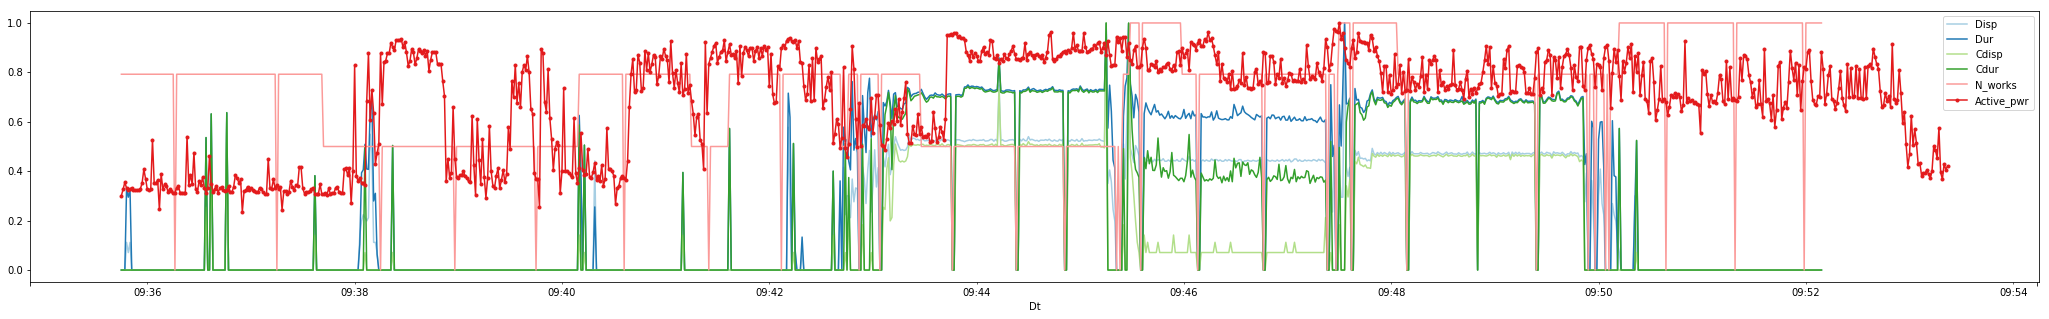

In [29]:
plt.figure(figsize=(36, 5))
ax = plt.gca()
joined.drop('Ev', axis=1).pipe(norm_log).drop('Active_pwr', axis=1).plot(ax=ax, style='-')
joined.Active_pwr.pipe(norm_max).plot(ax=ax, style='.-')
plt.legend();

## Just dispatch counts
### Sums

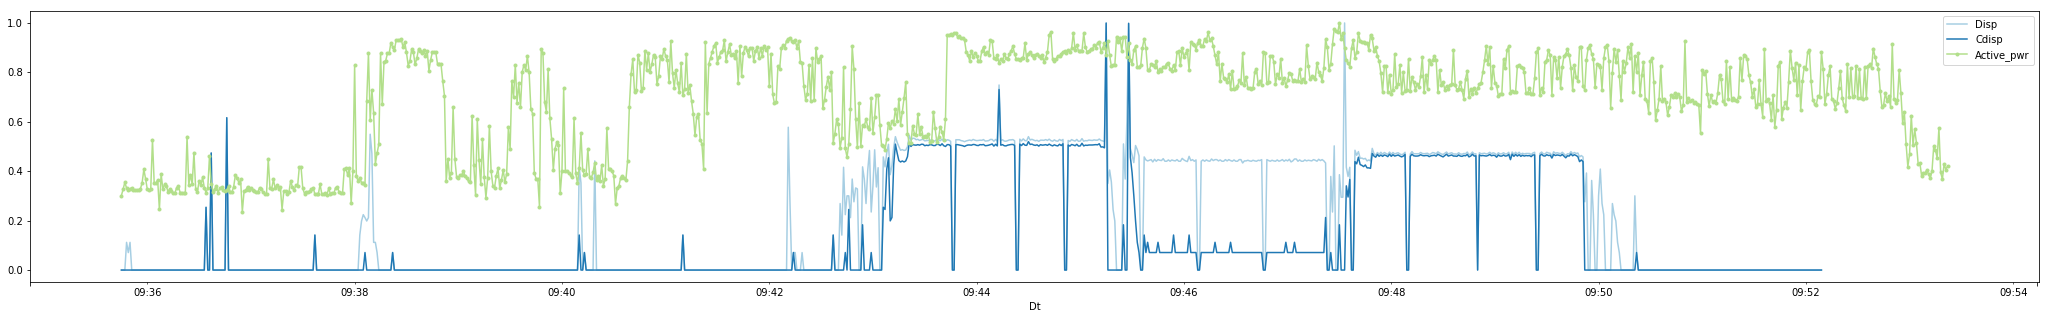

In [31]:
plt.figure(figsize=(36, 5))
ax = plt.gca()
joined[['Disp', 'Cdisp']].pipe(norm_log).plot(ax=ax, style='-')
# joined.pipe(norm_log).drop('Active_pwr', axis=1).plot(ax=ax, style='-')
joined.Active_pwr.pipe(norm_max).plot(ax=ax, style='.-')
plt.legend();

### All

#### Main

In [33]:
jn_dsp = ap.join(vecs['dispatchCount'].pipe(lambda x: x[ngu.non_zero_cols(x)])).pipe(attach_events)
# jn_dsp = jn_dsp.assign(Ev=lambda x: ngu.abbrev_actions(x.Ev))

In [34]:
jn_dsp[:3]

,Active_pwr,0,1,2147483649,2147483725,2147483727,3,Ev
Dt,,,,,,,,
2018-09-13 09:35:45,11.80,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2018-09-13 09:35:46,12.80,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2018-09-13 09:35:47,13.91,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [35]:
def plot_actions(joined, ev_col='action', ax=None, y_txt=40, y_marg=10):
    "joined: Dataframe w/ datetime index and an `ev_col` column"
    if ax is None:
        ax = plt.gca()
    plt.ylim(None, y_txt + y_marg)
    acts = joined[[ev_col]].dropna().assign(L=1)
    acts.L.plot(ax=ax, style='.k')
    
    props = {'ha': 'left', 'va': 'bottom'}
    offset = 2
    for ts, agdf in acts.groupby(acts.index.round('S')):
        for i, e in enumerate(agdf[[ev_col]].itertuples(index=True)):
            ax.text(e.Index, y_txt - i * offset, getattr(e, ev_col), props, fontsize=10, rotation=35)
            plt.vlines(e.Index, 0, y_txt, linestyles='--')

In [214]:
# edf.action.map(abbrev_action)
# edf['Act'] = edf.action.map(ngu.abbrev_action)

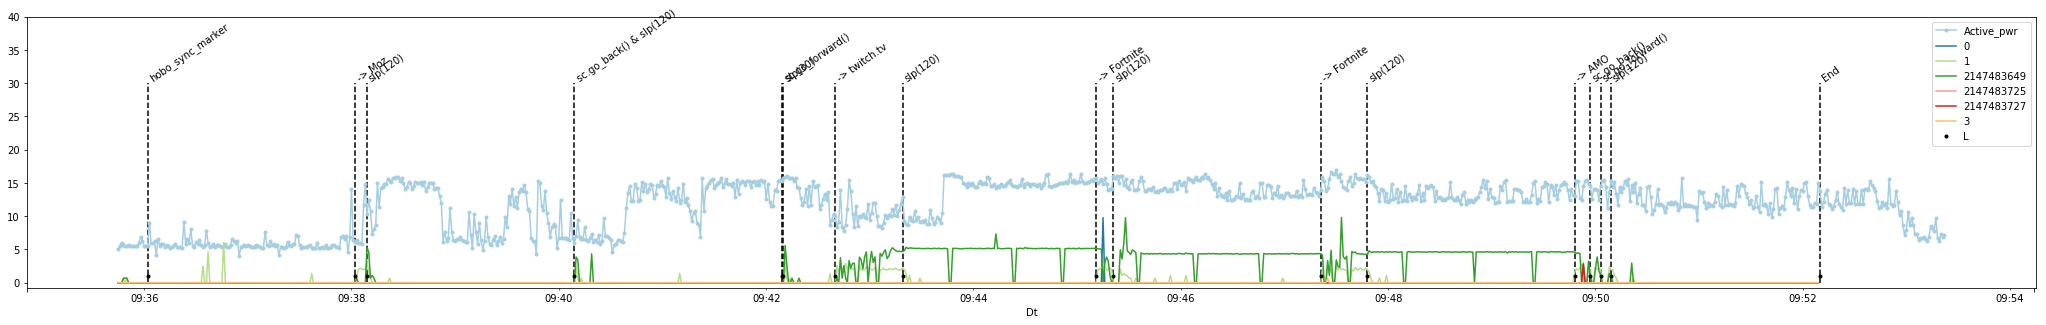

In [36]:
plt.figure(figsize=(36, 5))
ax = plt.gca()
jn_dsp.Active_pwr.pipe(norm_max).mul(17).plot(ax=ax, style='.-')
jn_dsp.drop(['Active_pwr', 'Ev'], axis=1).pipe(np.log1p).plot(ax=ax, style='-')
plot_actions(jn_dsp, ev_col='Ev', ax=ax, y_txt=30)
plt.legend();

#### Children

In [38]:
jn_dspc = ap.join(cvecs['dispatchCount'].pipe(lambda x: x[ngu.non_zero_cols(x)])).pipe(attach_events)

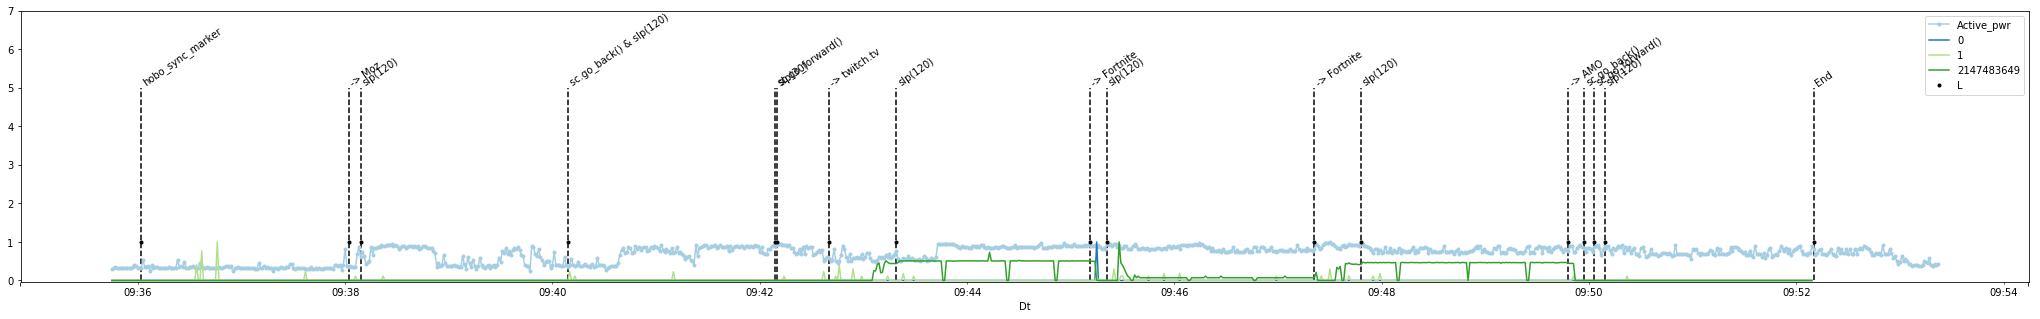

In [43]:
plt.figure(figsize=(36, 5))
ax = plt.gca()
jn_dspc.Active_pwr.pipe(norm_max).plot(ax=ax, style='.-')
jn_dspc.drop(['Active_pwr', 'Ev'], axis=1).pipe(norm_log).plot(ax=ax, style='-')
plot_actions(jn_dspc, ev_col='Ev', ax=ax, y_txt=5, y_marg=2)
plt.legend();

## Zoom in

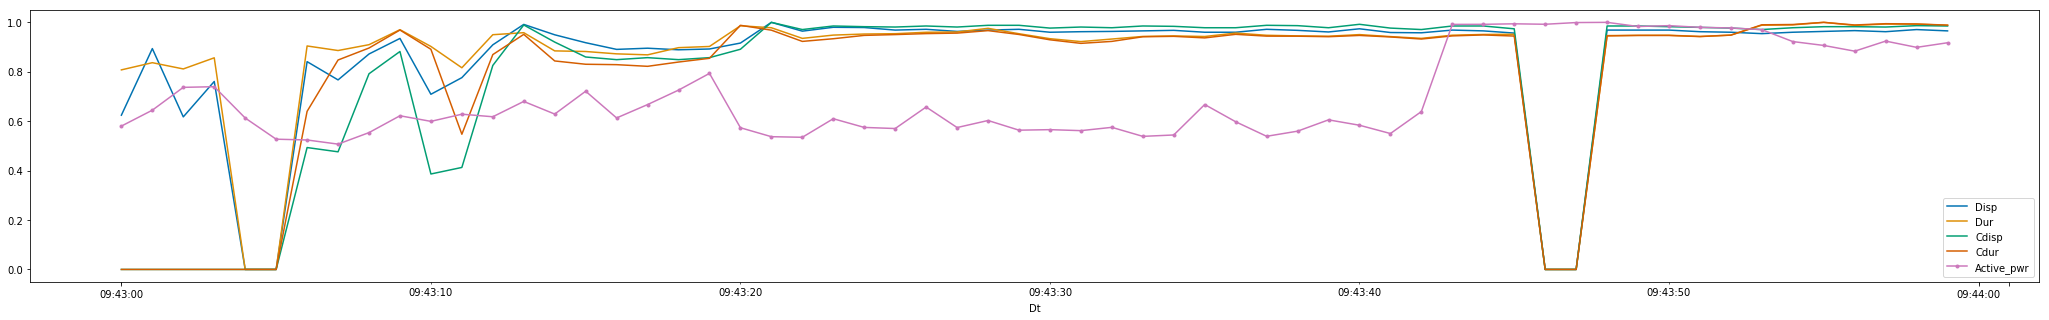

In [112]:
plt.figure(figsize=(36, 5))
ax = plt.gca()

jpdf = joined.loc[tix(43.0, n=60)]
jpdf.pipe(norm_log).drop('Active_pwr', axis=1).plot(ax=ax, style='-')
jpdf.Active_pwr.pipe(norm_max).plot(ax=ax, style='.-')

plt.legend();